### 불순도 impurity
* 데이터 그룹내 얼마나 다양한 객체가 있는지를 수치로 표현
* 의사결정나무의 가지는 불순도가 적은 방향으로 형성해 나감
* 불순도를 계산하는 알고리즘에는 CART, ID3/C4.5/C5, CHAID등이 있음
* 각각의 알고리즘을 통해 얻을수 있는 지표는 지니계수, 엔트로피등이 있음

<img src='img/impurity.png'>

### 불순도 계산 알고리즘 비교
* CART : 보편적 알고리즘, 불순도 지표로 포지니계수 사용, 계산속도 빠름
* ID3 : 범주형변수를 이용한 이항분류, 불순도 지표로 엔트로피 사용
    + C4.5 : 다항분류, 연속형변수를 이용한 회귀에도 사용가능
    + C5 : 저작권이 걸린 알고리즘, 앙상블트리 생성
* CHAID : 통계적 분석 적용, 범주형변수는 카이제곱 검정을, 연속형변수는 F검정을 통해 분류작업 수행

### 엔트로피
* 물리 열역학에서의 관점
    + 물질의 열적상태를 나타내는 물리량의 하나
    + 보통 무질서도라고 함
    + 엔트로피가 높으면 무질서도가 즐가
* 통계에서의 관점
    + 정보이득의 혼잡도/불순도
    + 엔트로피가 높으면 정보이해가 어려워짐
    + 즉, 정보의 불확실성을 수치로 나타낸 것
* 학습데이터는 기본적으로 혼잡한 상태
    + 따라서, 어떤 조건으로 분류해야만 전체 불순도가 개선되는지 계산
    + 정리한 결과에 대해 다시 계산해서 처리를 반복 적용

In [1]:
# x = [1,2,3,4,5,6,7,8]
# y = [0,0,0,1,1,1,1,1]
# x를 기준으로 y를 나누는 가장 좋은 방법은?
# 방법1) x = 3.5 (최적의 조건)
# 방법2) x = 4.5 (오분류 가능성 존재)

### 엔트로피 공식
### $ entropy = - \sum p_k \log2 p_k $
* 복수의 현상(1~n)이 존재할때 그 불순도를 나타내는 엔트로피 식
    + -p(현상1) * log(p(현상1)) + -p(현상2) * log(p(현상2)) + ... + -p(현상n) * log(p(현상n))
* 엔트로피는 일반적으로 2를 밑으로 하는 로그로 계산함

In [2]:
import math

In [3]:
# 확률 0.1 현상이 10개 일어난 경우 엔트로피는?
-1 * (0.1 * math.log2(0.1)) * 10

3.3219280948873626

In [4]:
# 확률 0.25 현상이 4개 일어난 경우 엔트로피는?
-1 * (0.25 * math.log2(0.25)) * 4 

2.0

In [160]:
# 데이터 상황별 불순도 확인  (빨간공, 파란공 갯수)
data1 =  [0, 10]
data2 =  [3, 7]
data3 =  [5, 5]

In [167]:
ep1 = (-1 * math.log2(1)) * 0 + (-1 * math.log2(1))  * 10
ep1

-0.0

In [171]:
ep2 = (-3/10 * math.log2(3/10)) + (-7/10 * math.log2(7/10))
ep2

0.8812908992306927

In [172]:
ep3 = (-5/10 * math.log2(5/10)) + (-5/10 * math.log2(5/10))
ep3

1.0

### 3가지 특성에 따라 10마리 동물을 개/고양이로 분류하기
* catdog csv 를 가져왔음

In [5]:
# big   follow   walking      class
# yes     yes    yes          dog
# yes     yes    no           cat
# no      yes    yes          dog
# yes     yes    yes          dog
# no      no     yes          cat
# yes     no     yes          dog
# yes     no     yes          cat
# no      no     no           cat
# yes     yes    yes          dog
# no      yes    no           dog

In [6]:
# 1) target 엔트로피 계산
# 10마리중 개는 6마리, 고양이는 4마리
# 개로 분류될 확률 : 6/10 = 0.6
# 고양이로 분류될 확률 : 4/10 = 0.4
# 따라서, 엔트로피는
# -0.6 * log2(0.6) - 0.4 * log2(0.4)

In [7]:
a = -0.6 * math.log2(0.6)
b = -0.4 * math.log2(0.4)
a + b

0.9709505944546686

In [8]:
# 2) 덩치(big)로 분류했을때 엔트로피 계산
# 덩치가 큰것으로 분류 : 개:고양이 => 4:2
# 덩치가 클때 개로 분류될 확률 : 4/6
# 덩치가 클때 고양이로 분류될 확률 : 2/6
a = -0.667 * math.log2(0.667)
b = -0.333 * math.log2(0.333)
a + b 

0.9179621399872384

In [9]:
# 덩치가 작은것으로 분류 : 개:고양이 => 2:2
# 덩치가 작을때 개로 분류될 확률 : 2/4 => 0.5
# 덩치가 작을때 고양이로 분류될 확률 : 2/4 => 0.5
a = -0.5 * math.log2(0.5) * 2
a

1.0

### 정보획득
* 불순도 지표를 구할 수 있다면, 이를 통해 어떤 질문에서 얻을 수 있는 정보획득량을 계산할 수 있음
    + 분할되기 전 데이터에서 얻을 수 있는 정보획득량과 
    + 어떤 기준에 따라 분할된 데이터에서 얻을 수 있는 적보획득량 비교
* 생성된 크기에 따라 가중치를 구하고 이를 불순도에 곱함

In [10]:
# 덩치로 분류했을때의 정보흭득량은
# 개로 분류될 확률 X 덩치로 분류했을때 불순도와
# 고양이로 분류될 확률 X 덩치로 분류했을떄 불순도를 더한 결과값
6/10 * 0.918 + 4/10 * 1.0 

0.9508

In [173]:
# 3) 따름follow로 분류했을때 엔트로피 계산
# 잘 따름으로 분류 = 개:고양이 : => 5:1
# 잘 따를떄 개로 분류될 확률 : 5/6
# 잘 따를떄 고양이로 분류될 확률 : 1/6
a = -0.833 * math.log2(0.833)
b = -0.167 * math.log2(0.167)
a + b

0.6507958209094192

In [12]:
# 잘 안따름으로 분류 = 개:고양이 => 1:3
# 잘 안따를때 개로 분류될 확률 : 1/4
# 잘 안따를때 고야잉로 분류될 확률 : 3/4
a = -0.25 * math.log2(0.25)
b = -0.75 * math.log2(0.75)
a + b

0.8112781244591328

In [13]:
# 따름으로 분류했을때의 정보흭득량은
# 개로 분류될 확률 X 따름으로 분류했을때 불순도와 
# 고양이로 분류될 확률 X 따름으로 분류했을떄 불순도를 더한 결과값
6/10 * 0.651 + 4/10 * 0.811

0.7150000000000001

In [14]:
# 4) 산책walking으로 분류했을때 엔트로피 계산
# 산책한다로 분류 = 개:고양이 => 5:2
# 산책하는데 개로 분류될 확률 : 5/7
# 산책하는데 고양이로 분류될 확률 : 2/7
a = -0.714 * math.log2(0.714)
b = -0.286 * math.log2(0.286)
a + b

0.8634979738266906

In [15]:
# 산책안한다로 분류 = 개:고양이 => 1:2
# 산책안하는데 개로 분류될 확률 : 1/3
# 산책안하는데 고양이로 분류될 확률 : 2/3
a = -0.333 * math.log2(0.333)
b = -0.667 * math.log2(0.667)
a + b

0.9179621399872384

In [16]:
# 산책으로 분류했을때의 정보흭득량은
# 개로 분류될 확률 X 산책으로 분류했을때 불순도와
# 고양이로 분류될 확률 X 산책으로 분류했을때 불순도를 더한 결과값
6/10 * 0.863 + 4/10 * 0.918

0.885

### 개/고양이 분류를 의사결정나무로 분석

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
import pydotplus
from sklearn import tree
import matplotlib.image as pltimg

In [21]:
# 데이터 읽어오기
catdog = pd.read_csv('data/catdog.csv')
catdog.head()

,big,follow,walking,class
0,yes,yes,yes,dog
1,yes,yes,no,cat
2,no,yes,yes,dog
3,yes,yes,yes,dog
4,no,no,yes,cat


<AxesSubplot:xlabel='class', ylabel='count'>

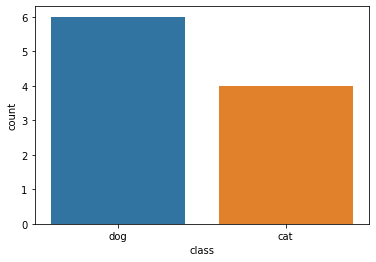

In [22]:
# 종속변수 빈도 확인
catdog['class'].value_counts()
sns.countplot(x='class', data=catdog)

In [23]:
# 전처리 - 레이블인코딩
cols = ['big','follow','walking','class']

In [24]:
for c in cols:
    catdog[c] = pd.Categorical(catdog[c])
    catdog[c] = catdog[c].cat.codes
catdog.head()

,big,follow,walking,class
0,1,1,1,1
1,1,1,0,0
2,0,1,1,1
3,1,1,1,1
4,0,0,1,0


In [25]:
# 데이터 분리 및 분석
data =  catdog.iloc[:, :3]
target = catdog['class']

In [26]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(data, target)
dtc.score(data, target)

0.9

In [27]:
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=cols[:3], class_names=['cat','dog'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('img/catdog.png')

True

(-0.5, 710.5, 580.5, -0.5)

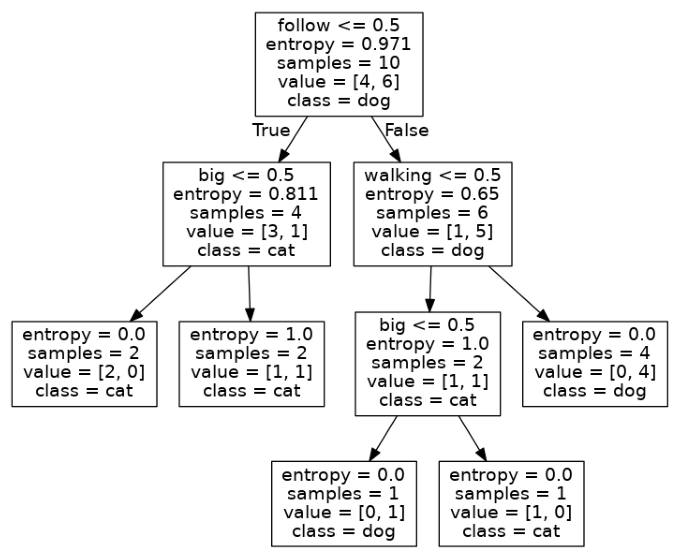

In [28]:
img = plt.imread('img/catdog.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

### 날씨상황에 따른 골프실행 여부 분석

In [76]:
golf = pd.read_csv('data/playgolf.csv', sep='|')
golf.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,sunny,85,85,False,Don'tPlay
1,sunny,80,90,True,Don'tPlay
2,overcast,83,78,False,Play
3,rain,70,96,False,Play
4,rain,68,80,False,Play


In [77]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OUTLOOK      14 non-null     object
 1   TEMPERATURE  14 non-null     int64 
 2   HUMIDITY     14 non-null     int64 
 3   WINDY        14 non-null     bool  
 4   PLAY         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes


In [78]:
golf['OUTLOOK'].value_counts()

sunny       5
rain        5
overcast    4
Name: OUTLOOK, dtype: int64

In [79]:
# 데이터 전처리
cols = ['OUTLOOK', 'WINDY', 'TEMPERATURE', 'HUMIDITY', 'PLAY',]

for c in cols:
    golf[c] = pd.Categorical(golf[c])
    golf[c] = golf[c].cat.codes

golf.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,2,11,5,0,0
1,2,8,6,1,0
2,0,10,3,0,1
3,1,4,8,0,1
4,1,2,4,0,1


In [80]:
# 데이터 분석

data = golf.iloc[:, :4]
target = golf.PLAY

In [136]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(data, target)
dtc.score(data, target)

1.0

In [137]:
# 분석결과 시각화

dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=cols[:4], class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('img/golf.png')

True

(-0.5, 730.5, 740.5, -0.5)

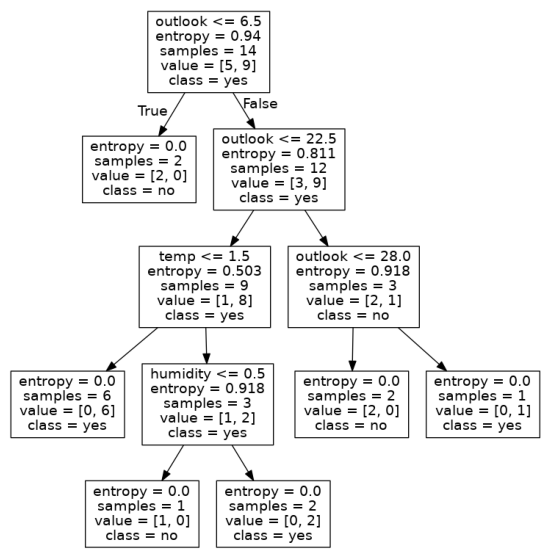

In [138]:
img = plt.imread('img/golf.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

In [108]:
# 텍스트파일로 재확인
golf1 = pd.read_csv('data/playgolf.txt', sep=',')
golf1.head()

,day,temp,outlook,humidity,windy,playGolf
0,5,hot,sunny,high,False,no
1,6,hot,sunny,high,True,no
2,7,hot,overcast,high,False,yes
3,9,cool,rain,normal,False,yes
4,10,cool,overcast,normal,True,yes


In [109]:
golf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     int64 
 1   temp      14 non-null     object
 2   outlook   14 non-null     object
 3   humidity  14 non-null     object
 4   windy     14 non-null     bool  
 5   playGolf  14 non-null     object
dtypes: bool(1), int64(1), object(4)
memory usage: 702.0+ bytes


In [110]:
golf1['outlook'].value_counts()

sunny       5
rain        5
overcast    4
Name: outlook, dtype: int64

In [113]:
# 데이터 전처리
cols = ['outlook', 'windy', 'temp', 'humidity', 'playGolf',]

for c in cols:
    golf1[c] = pd.Categorical(golf1[c])
    golf1[c] = golf1[c].cat.codes

golf1.head()

,day,temp,outlook,humidity,windy,playGolf
0,5,1,2,0,0,0
1,6,1,2,0,1,0
2,7,1,0,0,0,1
3,9,0,1,1,0,1
4,10,0,0,1,1,1


In [139]:
# 데이터 분석

data = golf1.iloc[:, 1:5]
target = golf1.playGolf

In [156]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(data, target)
dtc.score(data, target)

0.8571428571428571

In [143]:
# 분석결과 시각화

dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=cols[1:5], class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('img/golf1.png')

True

(-0.5, 712.5, 580.5, -0.5)

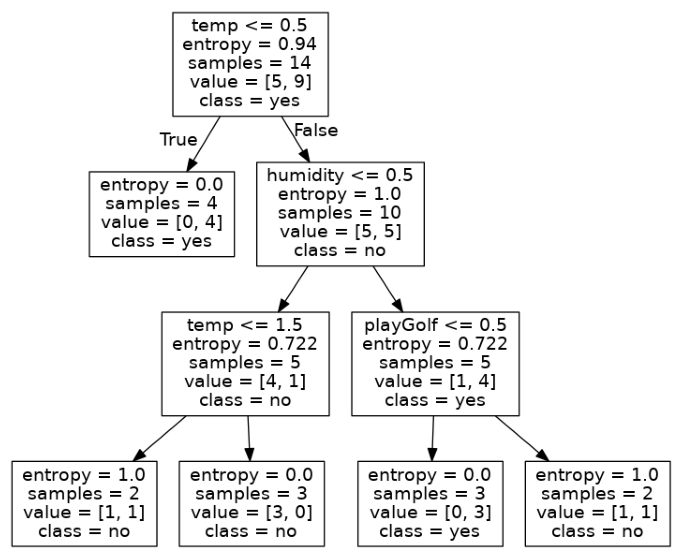

In [144]:
img = plt.imread('img/golf1.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

## 엔트로피 계산 편리하게 하기
* entropy([이벤트수, , ....], 로그밑수)

In [150]:
#pip install scipy

In [152]:
from scipy.stats import entropy

In [151]:
# 고양이와 개로 분류될 확률 = 4: 6
entropy([4,6], base=2)

0.9709505944546688

In [157]:
# 날씨상황에 따른 골프실행 엔트로피 계산
# 14개 날씨 데이터에서 골프침/골프안침 횟수 = 9 : 5
# -9/14 * log2(9/14) -5/14 * log2(5/14) 

entropy([9,5], base=2)   # 0.940

0.940285958670631